<a href="https://colab.research.google.com/github/hector323/Complete-Python-3-Bootcamp/blob/master/pp_python13_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
# Code to get ours to function correctly. Pandas plotting is built on top of matplotlib, so 
# we have to import it. 
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')
#note because we are using colabs we are loading in data a little differen than you would on your computer
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

Saving winequality-red.csv to winequality-red.csv


In [0]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')

In [0]:
# Revisit the data to see what it looks like. 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Histograms

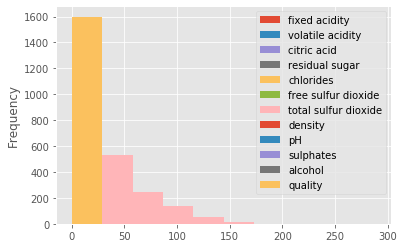

In [0]:
# Let's try a histogram first. 
df.plot(kind='hist') 

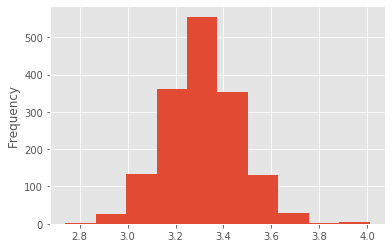

In [0]:
# That looked pretty bad. Since we didn't specify a column name to plot, Pandas just plotted
# all of them on top of one another. That's not what we want! Let's try selecting a column and doing that again. 
df['pH'].plot(kind='hist')

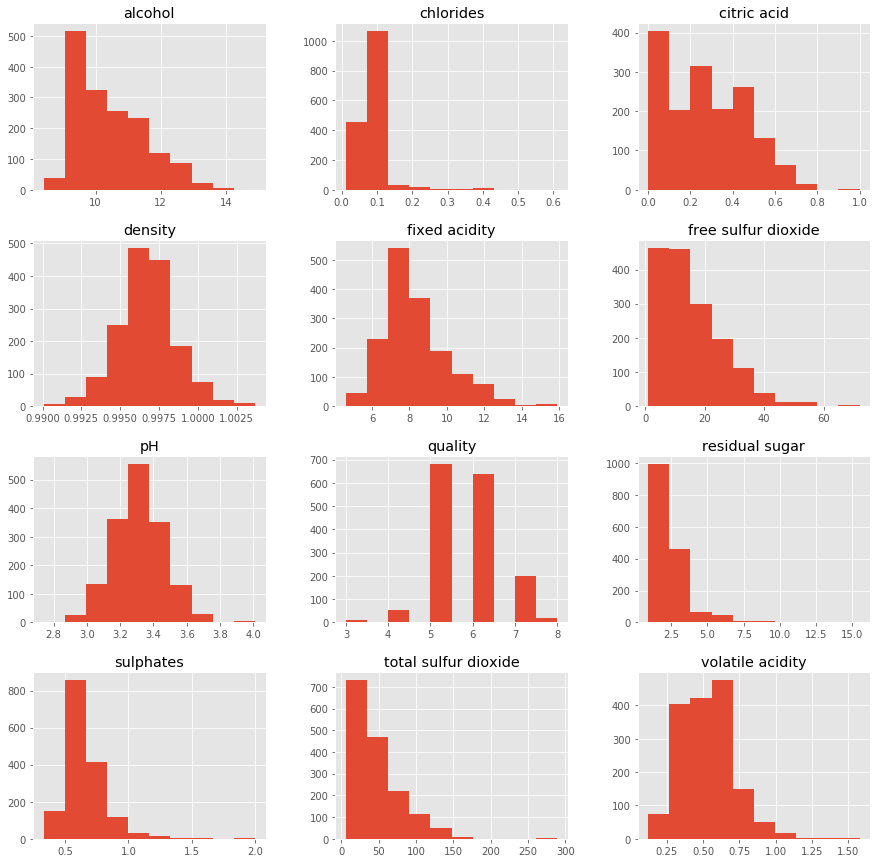

In [0]:
# We can also use .hist() to make a grid of histograms, one for each column.
# The figsize parameter is used for controlling the size of the figure on the screen
df.hist(figsize=(15,15));

# Scatter Plots

In [0]:
# This next command will not work. Any guesses why?
df.plot(kind='scatter')

ValueError: ignored

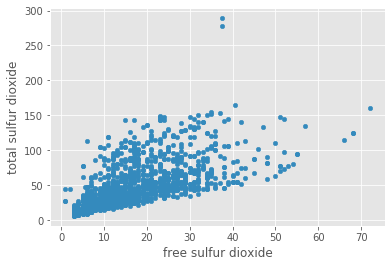

In [0]:
# As you might guess from the error, we have to specify X and Y columns for Pandas to plot. 
df.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide');

# Box Plots

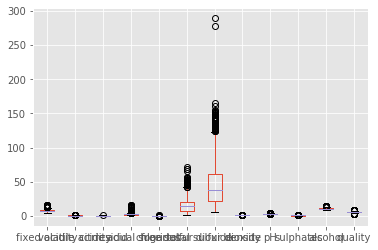

In [0]:
df.plot(kind='box')

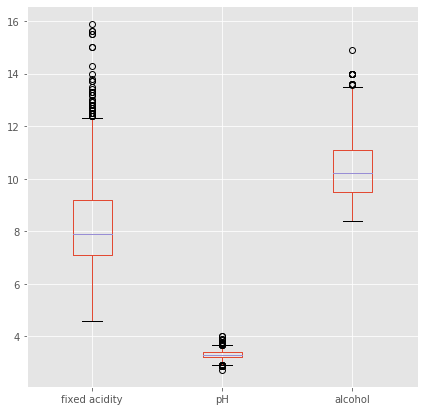

In [0]:
# We don't need to specify a column necessarily, but because of the different scales this 
# doesn't look too great. Let's specify three columns and see how that looks...
df[['fixed acidity', 'pH', 'alcohol']].plot(kind='box', figsize = (7, 7))

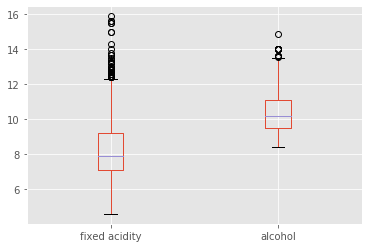

In [0]:
# This still doesn't look great - it's hard to really examine these three columns since pH is 
# so different from the other two. Let's drop pH and try one more time...
df[['fixed acidity', 'alcohol']].plot(kind='box')

# Scatter Matrix

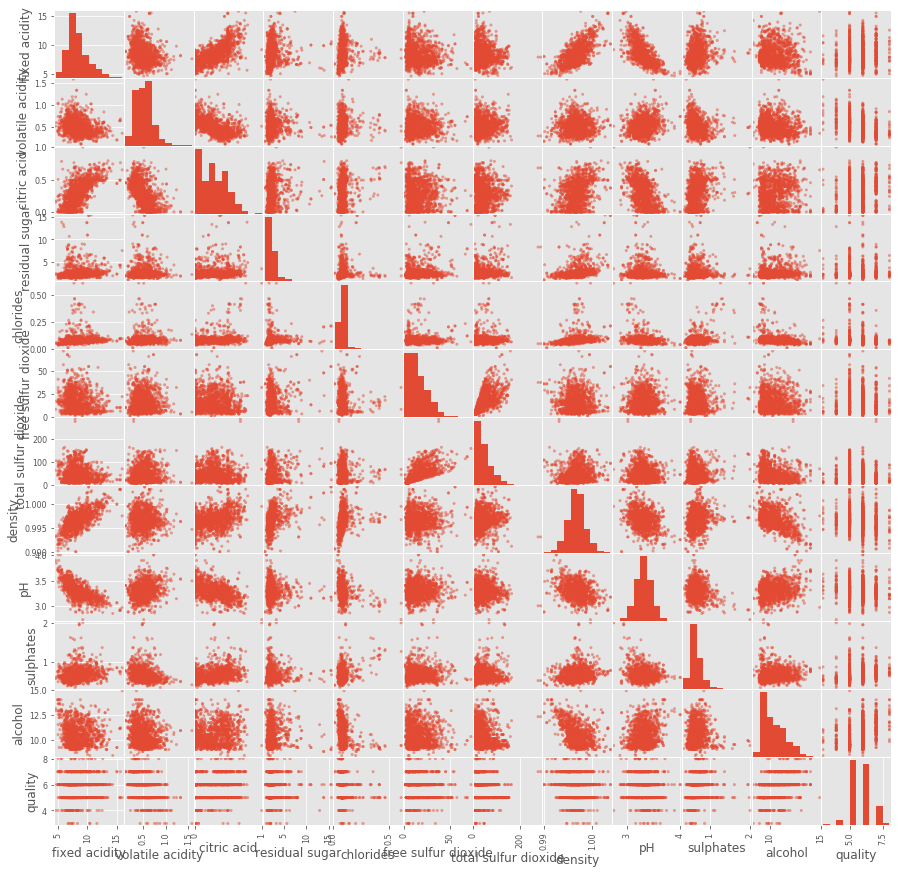

In [0]:
pd.plotting.scatter_matrix(df, figsize = (15, 15));


# Breakout!

Based on the scatter matrix, create two box plots of the most gaussian or normally distributed variables and create two scatter plots of:
1. what looks to you like the strongest positive association
2. what looks to you like the strongest negative association

# We have seen the above before, that was the built in pandas methods

# lets look at some other packages!


### Beyond Pandas
Now that you have had a brief encounter with the built in pandas data visualizations we want to look beyond what can be done with pandas and see what other libraries we can use. There are two more commonly used ones, `matplotlib` and `seaborn`

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


We can create many of the plots we did with the built in pandas but with more customizability and versitility, however there will be some things we might take for granted, which you will discover very quickly.

In [0]:
# built in pandas histogram
df['pH'].plot(kind='hist') 

In [0]:
# using matplotlib
plt.hist(df['pH']);

# **Question** <br>
What is the differences that you see between these two histograms?


With matplotlib we can customize our figures even more:

In [0]:
plt.hist(df['pH'], bins = 20, color = 'purple')
plt.title('Histogram of pH')
plt.ylabel('Frequency')
plt.xlabel('pH')
;

For more infomation about matplotlib you can click [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) and for seaborn click [here](https://seaborn.pydata.org/)


What are some other plots that we can use with these other libraries?

In [0]:
sns.distplot(df['pH']);

In [0]:
sns.boxplot(df['alcohol'])

In [0]:
plt.boxplot(df['alcohol']);

In [0]:
sns.pairplot(df);

# Let's check out our fruit data


In [0]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['fruit_data.tsv']))

Saving fruit_data.tsv to fruit_data (1).tsv


In [0]:
fruit = pd.read_csv('fruit_data.tsv', delim_whitespace= True)

In [0]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [0]:
plt.figure(figsize = (10, 7))
for f in fruit['fruit_name'].unique():
  plt.scatter(x = fruit['mass'][fruit['fruit_name']==f], y = fruit['width'][fruit['fruit_name']==f], label = f)

plt.xlabel('Fruit Mass')
plt.ylabel('Fruit Width')
plt.title('Scatter plot of fruit mass compared to \n fruit width by fruit name')
plt.legend()

In [0]:
plt.figure(figsize = (10, 7))
for f in fruit['fruit_subtype'].unique():
  plt.scatter(x = fruit['mass'][fruit['fruit_subtype']==f], y = fruit['width'][fruit['fruit_subtype']==f], label = f)

plt.xlabel('Fruit Mass')
plt.ylabel('Fruit Width')
plt.title('Scatter plot of fruit mass compared to \n fruit width by fruit subtype')
plt.legend()